<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793509/blob/main/IBM%20-%20Data%20Analysis%20with%20Python/Semana%208%20-%20Data%20Analysis%20with%20Python%20(IBM)%20(M%C3%B3dulo%205).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

📅 Semana 8

🚀 Curso: Data Analysis with Python (IBM: DA0101EN)

📖 Módulo 5

Alberto José García Porras (**A01793509**)


---

☝ **Evaluación y afinamiento de modelos:**

Una vez diseñamos nuestro modelo es hora de determinar si funciona de acuerdo a lo esperado o si debemos realizar ajustes. Esto es lo que aprenderemos en este notebook.

---

☝ **NOTA:** Estaré trabajando nuevamente con la base de datos **website-trafficcsv** que mide el tráfico de usuarios que ingresa diariamente a un sitio web universitario.

---

👓 Siguiendo lo aprendido en el módulo 1 utilizaremos el método **read_csv()** de la librería **Pandas** para leer los datos e introducirlos en nuestro dataframe.

---

In [2]:
#Importamos la librería pandas y leemos el archivo website-traffic.csv
import pandas as pd
url = "https://openmv.net/file/website-traffic.csv"
df = pd.read_csv(url)

#Convertimos las dos variables de entrada que utilizaremos para nuestro ejercicio
df.DayOfWeek = pd.Categorical(df.DayOfWeek)
df['DayOfWeek'] = df.DayOfWeek.cat.codes

df.MonthDay = pd.Categorical(df.MonthDay)
df['MonthDay'] = df.MonthDay.cat.codes

#Visualizamos los primeros 10 registros
df.head(10)

,DayOfWeek,MonthDay,Year,Visits
0,1,93,2009,27
1,5,104,2009,31
2,6,115,2009,38
3,4,117,2009,38
4,0,118,2009,31
5,2,119,2009,24
6,3,120,2009,21
7,1,121,2009,29
8,5,122,2009,30
9,6,94,2009,22


---

👣 **DATOS DE ENTRENAMIENTO Y PRUEBA:** Un aspecto importante para la prueba de nuestro modelo será la segmentación de los datos en dos conjuntos, entrenamiento y prueba. Esta separación debemos realizarla para las variables independientes (atributos de entrada) y para las variables dependientes (variable a predecir).

---


🙌 **Manos a la obra !!!**

In [3]:
#Definimos inicialmente nuestra variable a predecir (Visits) y la asignamos a la 'Y'
Y = df['Visits']

#Asignamos nuestras variables dependientes o predictoras a 'X', para ello asignamos todas la columnas del DF excepto la variable de salida.
X = df.drop('Visits',axis=1)

In [10]:
#Vamos a utilizar 'DayOfWeek' para predecir el número de visitas ('Visits') al sitio web.
#Capturamos nuestra variable independiente (X) y nuestra variable a predecir o dependiente (Y)
X = df[['DayOfWeek']]
Y = df['Visits']

#Importamos el método para dividir el dataframe en los conjuntos de train y validación
from sklearn.model_selection import train_test_split

#Ejecutamos el método y asignamos a nuestro conjunto de validación el 30% de los datos, quedando el conjunto de entrenamiento con el 70%
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X, Y, test_size=0.30, random_state=1)

#Imprimimos el número de registros por cada conjunto creado
print("Número de registros de entrenamiento:", X_Train.shape[0])
print("Número de registros de validación:",X_Val.shape[0])

Número de registros de entrenamiento: 149
Número de registros de prueba: 65


---


🖊 **NOTA:** Utilizaremos para fines de aprendizaje el método de regresión lineal en nuestro modelo.


---



In [11]:
#Llamamos el modelo de regresión lineal de la librería sklearn
from sklearn.linear_model import LinearRegression

#Instanciamos el objeto de regresión a utilizar
RL = LinearRegression()

#Ajustamos nuestro modelo con los datos de entrenamiento
RL.fit(X_Train, Y_Train)

#Una vez entrenado el modelo, calculamos y comparamos el score del modelo para los datos de validación y para los datos de entrenamiento
print("El score R^2 para el conjunto de entrenamiento es de", RL.score(X_Train, Y_Train), "y el score R^2 para pruebas es", RL.score(X_Val, Y_Val))

El score R^2 para el conjunto de entrenamiento es de 0.06100958692204894 y el score R^2 para pruebas es -0.01112330210802992




---


✍ Observamos que el R^2 para el conjunto de validación (-0.01112330210802992) es mucho menor que el del conjunto de entrenamiento (0.06100958692204894).

---

☝ **Score Cross-Validation**: Esta métrica es la más efectiva para el uso de los datos, ya que cada observación dada es utilizada tanto en el conjunto de entrenamiento como en el de validación. 

In [14]:
#Llamamos la librería que contiene la métrica
from sklearn.model_selection import cross_val_score

#Ejecutamos la función indicándole el modelo 'RL', la variable de entrada, la variable de salida y los pliegues (Folds) que queremos usar en las iteraciones
Score_Cross = cross_val_score(RL, X, Y, cv=4)

#Imprimimos la métrica obtenida
print("A continuación observaremos en el arreglo, el promedio del score R^2 por cada pliegue:")
Score_Cross

print("El promedio de los pliegues es", Score_Cross.mean(), "y la desviación estandar fue" , Score_Cross.std())

A continuación observaremos en el arreglo, el promedio del score R^2 por cada pliegue:
El promedio de los pliegues es -0.15417910799031376 y la desviación estandar fue 0.24613042626858647


---


☝ **Predict Cross-Validation**: Esta función nos permite predecir la salida, dividiendo el conjunto de datos en el número de pliegues especificado, tomando uno para validación y el resto para entrenamiento. La predicción devuelta corresponde a cada elemento obtenido en el pliegue de validación.

In [18]:
#Importamos el método de la librería sklearn
from sklearn.model_selection import cross_val_predict

#Ejecutamos la predicción con 4 pliegues
Y_Pred = cross_val_predict(RL, X, Y, cv=4)

print("Las predicciones encontradas según los datos enviados son:", Y_Pred[0:5])

Las predicciones encontradas según los datos enviados son: [20.89170301 25.15582089 26.22185036 24.08979142 19.82567353]


---

👣 **SOBRE-ENTRENAMIENTO, SUB-ENTRENAMIENTO Y SELECCIÓN DEL MODELO:** Para garantizar una adecuada selección de nuestro modelo, debemos garantizar que este no se encuentre sobre-entrenado ni sub-entrenado con los datos de validación y pruebas, en aras de que pueda estar preparado para utilizarse con data del mundo real.


*   **Sobre-entrenamiento:** ocurre cuando el modelo se ajusta el ruido, pero  no al modelo subyacente, por lo tanto, cuando probamos nuestro modelo utilizando los datos de prueba, no presentará un adecuado desempeño, ya que está modelando el ruido.
*   **Sub-entrenamiento:** 


---

🙌 **Manos a la obra !!!**

---
☝ Teniendo en cuenta que el sobre-entrenamiento se puede presentar con mayor frecuencia en modelos de regresión lineal múltiples o en regresiones polinomiales, realizaremos los ejercicios con estos modelos.


In [19]:
#Utilizaremos inicialmente un modelo de regresión lineal múltiple: 
#Vamos a utilizar 'DayOfWeek' y 'MonthDay' para predecir el número de visitas ('Visits') al sitio web.
X = df[['DayOfWeek', 'MonthDay']]
Y = df['Visits']

#Ejecutamos la partición y asignamos a nuestro conjunto de validación el 30% de los datos, quedando el conjunto de entrenamiento con el 70%
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X, Y, test_size=0.30, random_state=1)

#Entrenamos el modelo con datos de entrenamiento
RL.fit(X_Train, Y_Train)
#Ejecutamos la predicción
Y_Predict_Train = RL.predict(X_Train)
print("Predicciones en entrenamiento:", Y_Predict_Train[0:5])

#Entrenamos el modelo con datos de validación
RL.fit(X_Val, Y_Val)
#Ejecutamos la predicción
Y_Predict_Val = RL.predict(X_Val)
print("Predicciones en entrenamiento:", Y_Predict_Val[0:5])

Predicciones en entrenamiento: [19.74148663 24.01456934 19.61604564 23.4736254  21.74134263]
Predicciones en entrenamiento: [26.26438567 18.04528902 26.78666994 27.47900448 20.96041058]



---


📊 Visualizaremos gráficamente la distribución de los valores de predicción en el conjunto de entrenamiento.


---

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


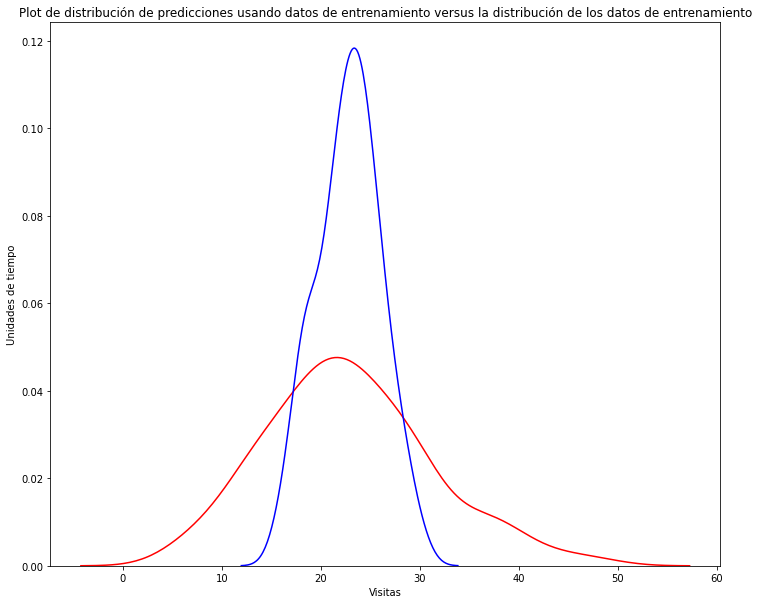

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Titulo = 'Plot de distribución de predicciones usando datos de entrenamiento versus la distribución de los datos de entrenamiento'

width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(Y_Train, hist=False, color="r", label="Actual Values (Train)")
ax2 = sns.distplot(Y_Predict_Train, hist=False, color="b", label="Predicted Values (Train)", ax=ax1)

plt.title(Titulo)
plt.xlabel('Visitas')
plt.ylabel('Unidades de tiempo')

plt.show()
plt.close()

---

👓 Comparemos ahora con la gráfica para los datos de validación:

---


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


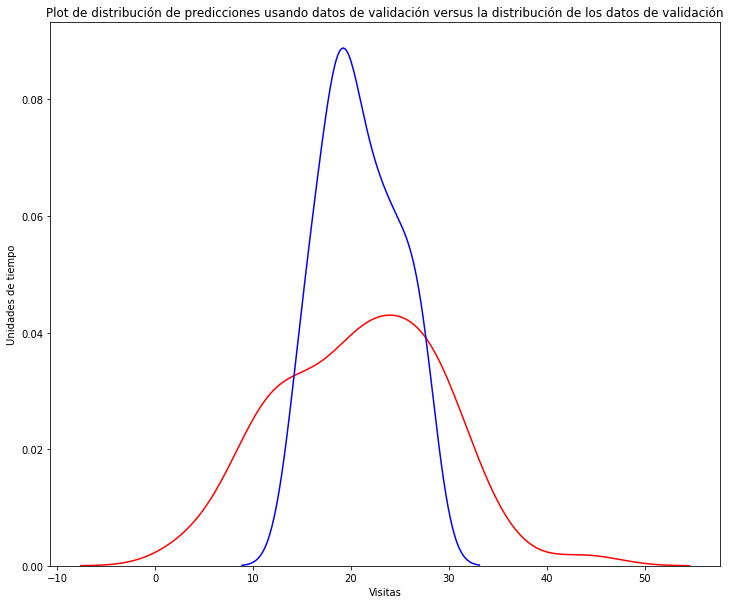

In [24]:
Titulo = 'Plot de distribución de predicciones usando datos de validación versus la distribución de los datos de validación'

width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(Y_Val, hist=False, color="r", label="Actual Values (Validación)")
ax2 = sns.distplot(Y_Predict_Val, hist=False, color="b", label="Predicted Values (Validación)", ax=ax1)

plt.title(Titulo)
plt.xlabel('Visitas')
plt.ylabel('Unidades de tiempo')

plt.show()
plt.close()

In [25]:
#Utilizaremos ahora un modelo de regresión polinomial: 
#Importamos la librería requerida
from sklearn.preprocessing import PolynomialFeatures

#Capturamos nuestra variable independiente (X) y nuestra variable a predecir o dependiente (Y)
X = df[['DayOfWeek']]
Y = df['Visits']

#Ejecutamos el split y asignamos a nuestro conjunto de validación el 45% de los datos, quedando el conjunto de entrenamiento con el 55%
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X, Y, test_size=0.45, random_state=1)

In [41]:
#Instanciamos nuestro objeto polinomial grado 5
Pol = PolynomialFeatures(degree=5)
X_Train_Pol = Pol.fit_transform(X_Train)
X_Val_Pol = Pol.fit_transform(X_Val)
Pol

PolynomialFeatures(degree=5)

In [42]:
#Creamos ahora nuestro modelo de regresión lineal polinomial y lo entrenamos
Pol_Mod = LinearRegression()
Pol_Mod.fit(X_Train_Pol, Y_Train)
#Realizamos la predicción para el conjunto de pruebas
Y_Pred_Pol = Pol_Mod.predict(X_Val_Pol)

print("Valores de predicción:", Y_Pred_Pol[0:5])
print("Valores reales:", Y_Val[0:5].values)

Valores de predicción: [25.10803305 25.10803305 25.84842615 27.46945521 27.46945521]
Valores reales: [44 13 23 24 27]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

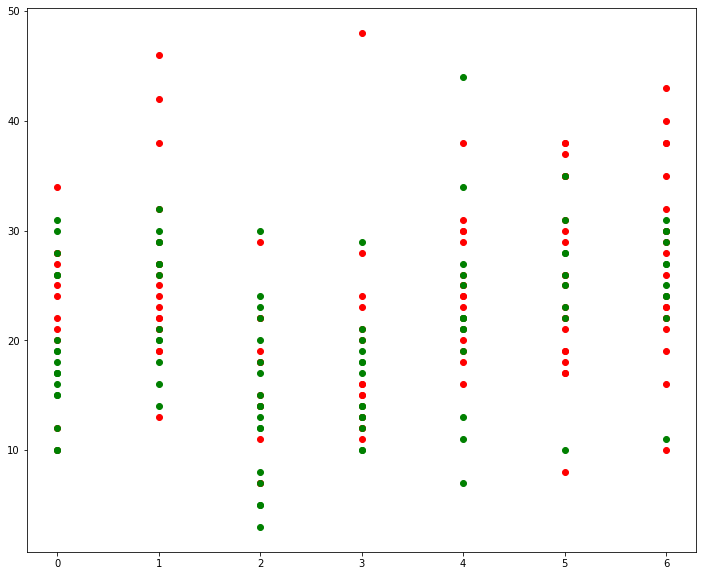

In [43]:
#Visualizaremos con un plot la función de predicción para los datos de entrenamiento y validación.
import numpy as np

width = 12
height = 10
plt.figure(figsize=(width, height))

xmax=max([X_Train.values.max(), X_Val.values.max()])

xmin=min([X_Train.values.min(), X_Val.values.min()])

X1=np.arange(xmin, xmax, 0.1)

plt.plot(X_Train, Y_Train, 'ro', label='Datos de Entrenamiento')
plt.plot(X_Val, Y_Val, 'go', label='Datos de Validación')
plt.plot(X1, RL.predict(Pol.fit_transform(X1.reshape(-1, 1))), label='Función de Predicción')
plt.ylim([-10000, 60000])
plt.ylabel('Visitas')
plt.legend()

---


ℹ Procedemos ahora a verificar las métricas obtenidas para este modelo:


---

In [46]:
print("El score R^2 para los datos de entrenamiento en el modelo polinomial fue de", Pol_Mod.score(X_Train_Pol, Y_Train))
print("El score R^2 para los datos de validación en el modelo polinomial fue de", Pol_Mod.score(X_Val_Pol, Y_Val))

El score R^2 para los datos de entrenamiento en el modelo polinomial fue de 0.1893865800899046
El score R^2 para los datos de validación en el modelo polinomial fue de 0.1596173763033365


Text(0.5, 1.0, 'R^2 Using Test Data')

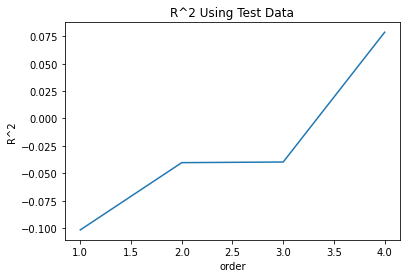

In [49]:
#Validamos con un plot como cambian los datos de prueba para los diferentes ordenes polinomiales
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    X_Train_Pol = pr.fit_transform(X_Train)
    
    X_Val_Pol = pr.fit_transform(X_Val)    
    
    RL.fit(X_Train_Pol, Y_Train)
    
    Rsqu_test.append(RL.score(X_Val_Pol, Y_Val))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')